In [1]:
#wine data --> Data analysis --> Data preprocessing --> Train Test split --> Random Forest Method
#                                                                                    |
#                                                      New Data --> Trained Random Forest Model --> Wine Quality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv("datasets/winequality-red.csv")
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#no of rows and columns
dataset.shape

(1599, 12)

In [5]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#null values
dataset.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#vizualizations
#statistical measures
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
quality_value = dataset["quality"].value_counts()
quality_valueDF = pd.DataFrame(quality_value)
quality_valueDF

,quality
5,681
6,638
7,199
4,53
8,18
3,10


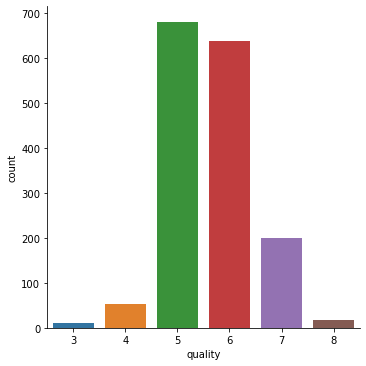

In [9]:
sns.catplot(x = 'quality', data = dataset , kind = 'count',margin_titles = True)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

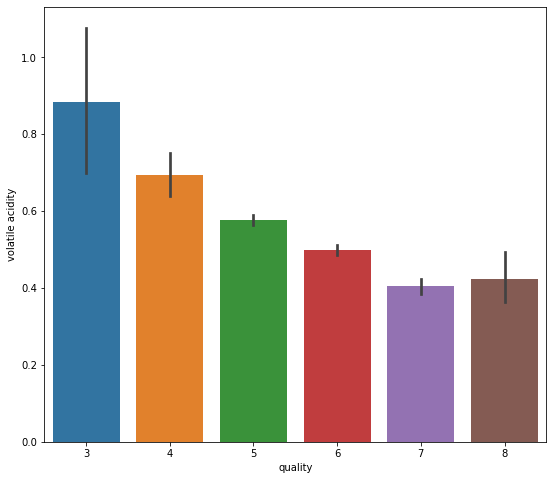

In [10]:
#volatile acidity vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "volatile acidity" , data = dataset)

#Hence higher the volatile acidity lower is the quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

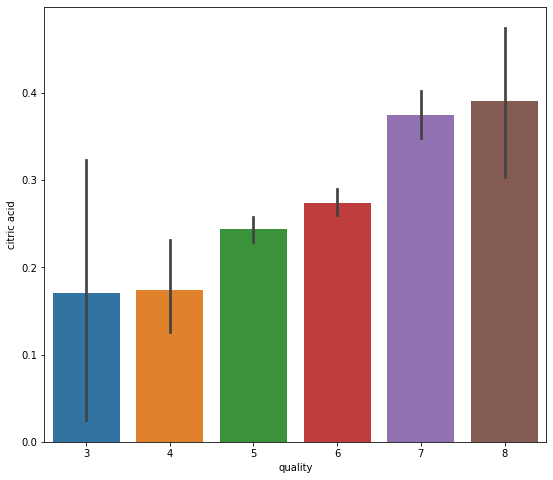

In [11]:
#citric acidity vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "citric acid" , data = dataset)

#Hence higher the citric acidity higher is the quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

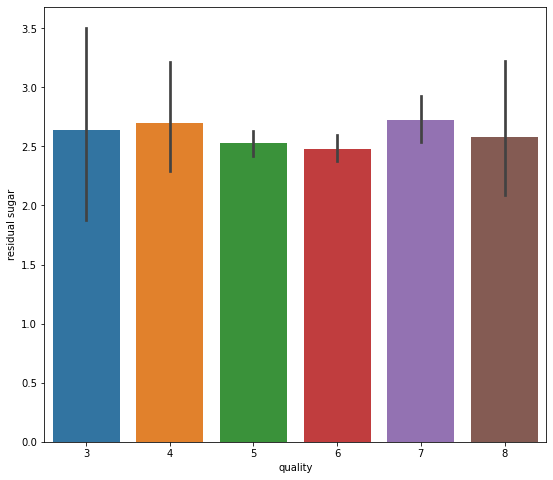

In [12]:
#residual sugar vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "residual sugar" , data = dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

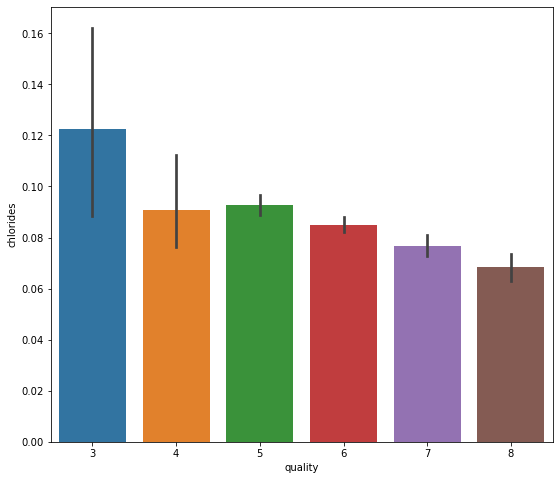

In [13]:
#chlorides vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "chlorides" , data = dataset)

#Hence higher the chlorides lower is the quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

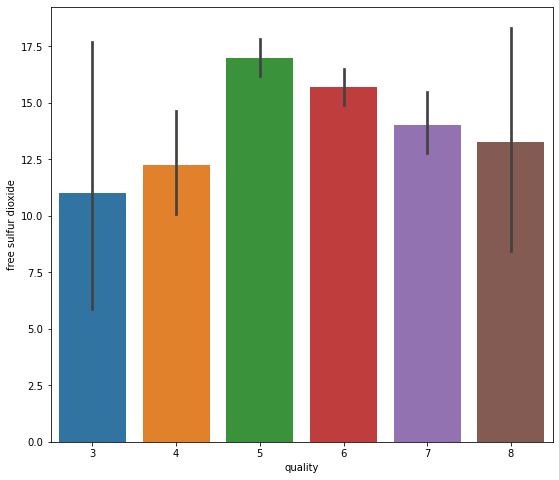

In [14]:
#free sulfur dioxide vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "free sulfur dioxide" , data = dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

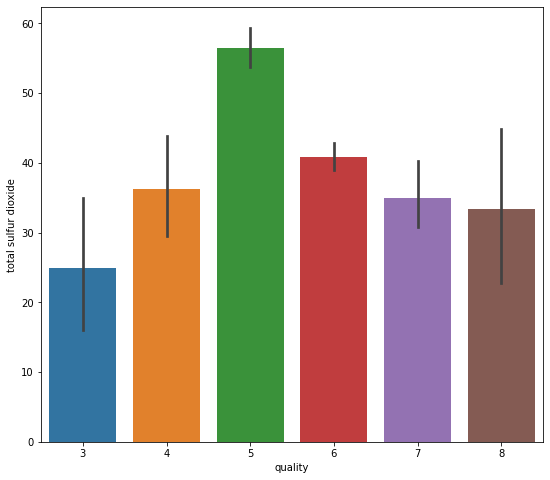

In [15]:
#total sulfur dioxide vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "total sulfur dioxide" , data = dataset)

<AxesSubplot:xlabel='quality', ylabel='density'>

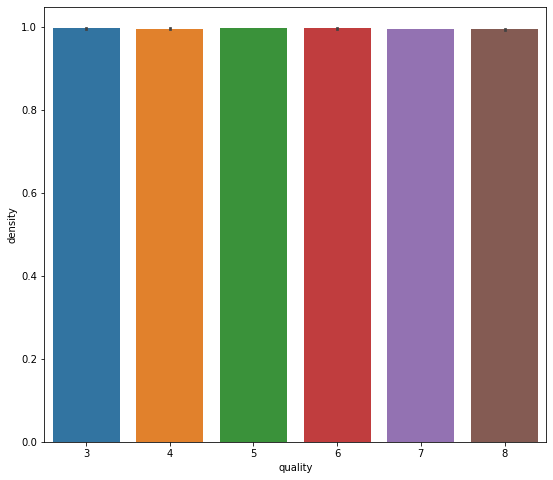

In [16]:
#density vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "density" , data = dataset)

<AxesSubplot:xlabel='quality', ylabel='pH'>

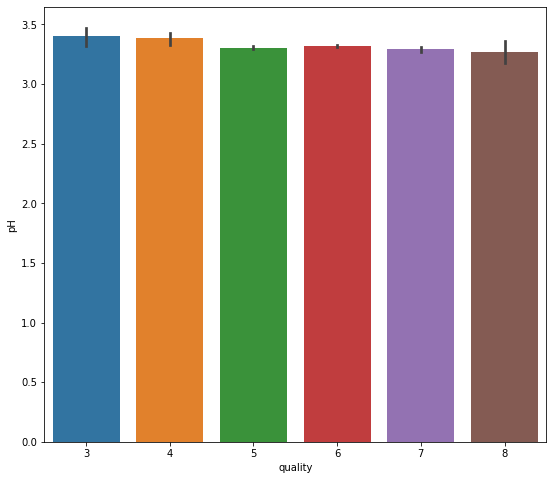

In [17]:
#pH vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "pH" , data = dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

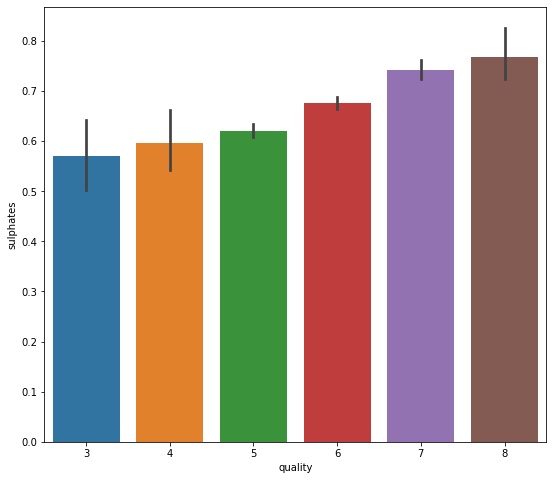

In [18]:
#sulphates vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "sulphates" , data = dataset)

#more higher the sulphates more is the quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

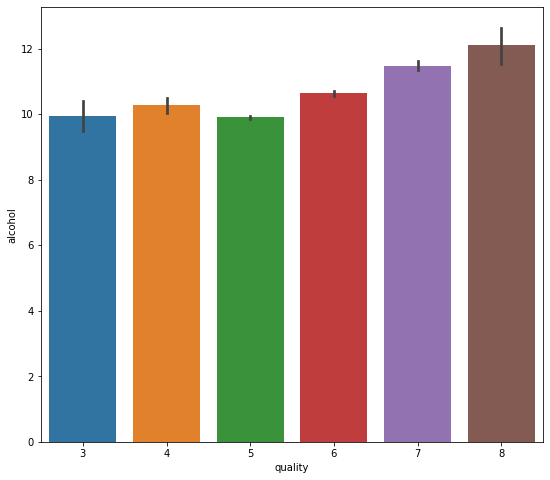

In [19]:
#alcohol vs quality
plot = plt.figure(figsize = (9,8))
sns.barplot(x = "quality", y = "alcohol" , data = dataset)

#more higher the alcohol more is the quality

In [20]:
#Correlation
correlation = dataset.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

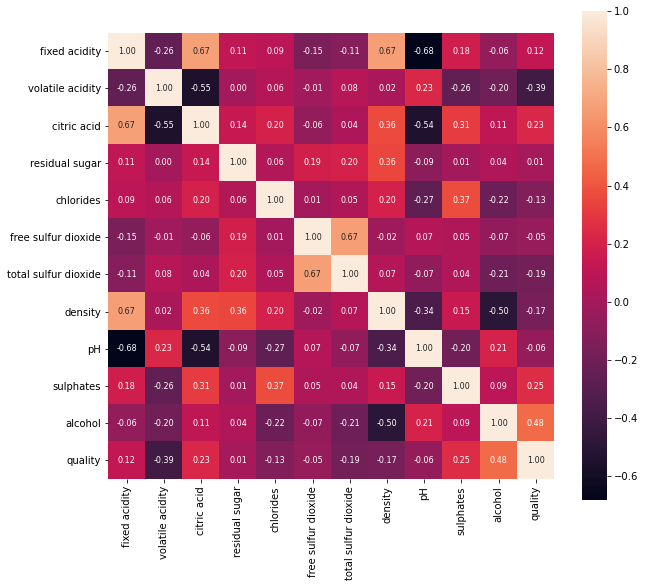

In [21]:
#heatmap
plt.figure(figsize = (10,9))
sns.heatmap(correlation,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

In [22]:
#split the data
X = dataset.drop('quality',axis = 1)

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
#Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [40]:
print(X_train)
print("\n")
print(X_test)
print("\n")
print(Y_train)
print("\n")
print(Y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
468            11.4              0.36         0.69             2.1      0.090   
1595            5.9              0.55         0.10             2.2      0.062   
372             9.1              0.28         0.48             1.8      0.067   
748             7.2              0.50         0.18             2.1      0.071   
1207            9.9              0.72         0.55             1.7      0.136   
...             ...               ...          ...             ...        ...   
299             6.9              0.67         0.06             2.1      0.080   
1558            6.9              0.63         0.33             6.7      0.235   
493             8.7              0.69         0.31             3.0      0.086   
527             7.0              0.38         0.49             2.5      0.097   
1192            7.2              0.25         0.37             2.5      0.063   

      free sulfur dioxide  

In [41]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [42]:
#Random Forest Model
model = RandomForestClassifier()

In [43]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
#accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [44]:
print("Accuracy ",test_data_accuracy*100,"%")

Accuracy  91.875 %


In [46]:
import pickle
#pickle is used for serialization = data to one specific model which is ready to use(DUMP)
#Deserialization = for loading that particular model(LOAD)
with open('test.pkl','wb') as files:
    pickle.dump(model,files)#writing of file